In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1cc5375d-420b-4443-80a0-7944e4e21617',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-09-10T16:52:55.466Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9592}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9727, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.914679e+07,1.914679e+07,NaN,1,NaN,NaN,None,2022-09-10T16:50:00.000Z,21320.569162,3.721386e+10,-16.9024,0.448667,0.404850,7.534338,-12.397845,6.969631,-23.744281,4.082204e+11,39.0185,4.477320e+11,None,2022-09-10T16:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 16:52:56.508419
1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.223158e+08,1.223158e+08,NaN,2,NaN,NaN,None,2022-09-10T16:50:00.000Z,1721.818529,1.265577e+10,-36.8616,0.303282,0.644332,10.822816,-9.138058,58.692858,13.755172,2.106056e+11,20.1400,2.106056e+11,None,2022-09-10T16:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 16:52:56.508419
2,825,Tether,USDT,tether,39521,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754620e+10,6.915678e+10,NaN,3,NaN,NaN,None,2022-09-10T16:50:00.000Z,1.000351,5.503177e+10,-16.5330,-0.000783,0.014400,0.027406,0.000895,0.114291,0.140550,6.756988e+10,6.4585,6.918102e+10,None,2022-09-10T16:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-10 16:52:56.508419
3,3408,USD Coin,USDC,usd-coin,6155,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.166024e+10,5.166024e+10,NaN,4,NaN,NaN,None,2022-09-10T16:50:00.000Z,1.000081,5.941611e+09,-14.1685,0.021498,0.003062,-0.009848,0.009785,-0.017248,0.015178,5.166441e+10,4.9447,5.166441e+10,None,2022-09-10T16:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-10 16:52:56.508419
4,1839,BNB,BNB,bnb,1098,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-10T16:50:00.000Z,293.513072,8.532229e+08,-21.0163,0.177710,0.720896,5.786479,-10.184916,28.800365,11.253053,4.735460e+10,4.5322,5.870261e+10,None,2022-09-10T16:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 16:52:56.508419
5,4687,Binance USD,BUSD,binance-usd,5056,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.000334e+10,2.000334e+10,NaN,6,NaN,NaN,None,2022-09-10T16:50:00.000Z,0.999970,1.044725e+10,-21.6576,0.006835,-0.003586,-0.013149,0.002950,-0.179180,-0.238692,2.000274e+10,1.9144,2.000274e+10,None,2022-09-10T16:50:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-10 16:52:56.508419
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-10T16:50:00.000Z,0.355128,1.003921e+09,-29.1765,-0.326934,2.614392,7.297907,-6.585185,12.916475,-1.398680,1.769463e+10,1.6921,3.551284e+10,None,2022-09-10T16:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 16:52:56.508419
7,2010,Cardano,ADA,cardano,568,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-10T16:50:00.000Z,0.513017,9.887228e+08,19.8875,-0.400749,4.196870,6.471577,-4.674386,17.592970,-3.493930,1.753596e+10,1.6783,2.308575e+10,None,2022-09-10T16:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 16:52:56.508419
8,5426,Solana,SOL,solana,380,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.531178e+08,5.116169e+08,NaN,9,NaN,NaN,None,

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1cc5375d-420b-4443-80a0-7944e4e21617',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv'):
        df.to_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv', mode = 'a', header = False)
        
    

In [16]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for one minute
exit()

API Runner completed


KeyboardInterrupt: 

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.914679e+07,1.914679e+07,NaN,1,NaN,NaN,None,2022-09-10T17:04:00.000Z,21379.173908,3.731233e+10,-16.9186,0.646145,0.400507,8.043047,-12.163861,7.445306,-23.466919,4.093425e+11,39.0573,4.489627e+11,None,2022-09-10T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:06:15.868653
1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.223158e+08,1.223158e+08,NaN,2,NaN,NaN,None,2022-09-10T17:04:00.000Z,1722.994807,1.263342e+10,-36.8097,0.316060,0.465158,11.186956,-9.264775,59.133304,14.246380,2.107495e+11,20.1032,2.107495e+11,None,2022-09-10T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:06:15.868653
2,825,Tether,USDT,tether,39521,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754620e+10,6.915678e+10,NaN,3,NaN,NaN,None,2022-09-10T17:04:00.000Z,1.000301,5.502361e+10,-16.8040,-0.005746,0.004890,0.020414,-0.003309,0.110483,0.127077,6.756656e+10,6.4468,6.917763e+10,None,2022-09-10T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-10 17:06:15.868653
3,3408,USD Coin,USDC,usd-coin,6156,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.166024e+10,5.166024e+10,NaN,4,NaN,NaN,None,2022-09-10T17:04:00.000Z,1.000010,5.931758e+09,-14.7496,0.010808,-0.001636,0.003718,0.005365,0.008953,-0.006496,5.166078e+10,4.9270,5.166078e+10,None,2022-09-10T17:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-10 17:06:15.868653
4,1839,BNB,BNB,bnb,1098,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-10T17:04:00.000Z,293.789188,8.554854e+08,-20.9996,0.138123,0.518600,6.001281,-10.173181,28.969195,11.423676,4.739914e+10,4.5206,5.875784e+10,None,2022-09-10T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:06:15.868653
5,4687,Binance USD,BUSD,binance-usd,5056,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.000334e+10,2.000334e+10,NaN,6,NaN,NaN,None,2022-09-10T17:04:00.000Z,1.000128,1.041526e+10,-22.1381,0.028415,0.008103,0.010461,0.043861,-0.038220,-0.020753,2.000591e+10,1.9080,2.000591e+10,None,2022-09-10T17:04:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-10 17:06:15.868653
6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,None,2022-09-10T17:04:00.000Z,0.355060,9.993409e+08,-29.7034,-0.363242,2.506579,7.496472,-6.319040,13.014388,-1.205502,1.769121e+10,1.6876,3.550597e+10,None,2022-09-10T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:06:15.868653
7,2010,Cardano,ADA,cardano,568,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,None,2022-09-10T17:04:00.000Z,0.512291,9.925081e+08,20.0899,-0.641997,4.045988,6.827295,-4.960360,17.513425,-3.394493,1.751115e+10,1.6701,2.305309e+10,None,2022-09-10T17:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:06:15.868653
8,5426,Solana,SOL,solana,380,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.531178e+08,5.116169e+08,NaN,9,NaN,NaN,None,2

In [18]:
temp = pd.read_csv(r'C:\Users\quort\OneDrive\Desktop\Data-Analyst-Portfolio\API.csv')
temp

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9727,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.914679e+07,1.914679e+07,NaN,1,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,21385.943900,3.729234e+10,-16.9183,0.711968,0.468276,8.025430,-12.173424,7.478403,-23.401409,4.094721e+11,39.0617,4.491048e+11,NaN,2022-09-10T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
1,1,1027,Ethereum,ETH,ethereum,6083,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.223158e+08,1.223158e+08,NaN,2,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,1723.042325,1.263958e+10,-36.8355,0.336177,0.480577,11.124803,-9.287508,59.151255,14.315302,2.107553e+11,20.1038,2.107553e+11,NaN,2022-09-10T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
2,2,825,Tether,USDT,tether,39521,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.754620e+10,6.915678e+10,NaN,3,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,1.000317,5.503461e+10,-16.7960,-0.005533,0.008564,0.022286,-0.001426,0.109768,0.131173,6.756759e+10,6.4456,6.917868e+10,NaN,2022-09-10T17:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-10 17:04:56.319851
3,3,3408,USD Coin,USDC,usd-coin,6156,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.166024e+10,5.166024e+10,NaN,4,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,0.999988,5.932793e+09,-14.8450,-0.000505,-0.006231,-0.002400,0.001520,0.001743,-0.005719,5.165960e+10,4.9269,5.165960e+10,NaN,2022-09-10T17:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-10 17:04:56.319851
4,4,1839,BNB,BNB,bnb,1098,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,293.835989,8.556021e+08,-20.9844,0.190199,0.547671,6.008130,-10.145423,28.979480,11.517051,4.740669e+10,4.5213,5.876720e+10,NaN,2022-09-10T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
5,5,4687,Binance USD,BUSD,binance-usd,5056,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.000334e+10,2.000334e+10,NaN,6,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,1.000016,1.042008e+10,-22.0883,0.001274,-0.000713,-0.004839,0.023887,-0.004451,-0.054956,2.000365e+10,1.9078,2.000365e+10,NaN,2022-09-10T17:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-10 17:04:56.319851
6,6,52,XRP,XRP,xrp,813,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.982602e+10,9.998930e+10,NaN,7,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,0.354916,1.000184e+09,-29.6111,-0.351093,2.448999,7.366426,-6.347532,12.927776,-1.221480,1.768403e+10,1.6869,3.549156e+10,NaN,2022-09-10T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
7,7,2010,Cardano,ADA,cardano,568,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.418204e+10,3.485495e+10,NaN,8,NaN,NaN,NaN,2022-09-10T17:03:00.000Z,0.511398,9.910905e+08,19.9782,-0.735990,3.687997,6.521092,-5.162415,17.287526,-3.435045,1.748064e+10,1.6672,2.301293e+10,NaN,2022-09-10T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-10 17:04:56.319851
8,8,5426,Solana,SOL,solana,380,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.531178e+08,5.116169e+08,NaN

In [24]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.646145,0.400507,8.043047,-12.163861,7.445306,-23.466919
Ethereum,0.316060,0.465158,11.186956,-9.264775,59.133304,14.246380
Tether,-0.005746,0.004890,0.020414,-0.003309,0.110483,0.127077
USD Coin,0.010808,-0.001636,0.003718,0.005365,0.008953,-0.006496
BNB,0.138123,0.518600,6.001281,-10.173181,28.969195,11.423676
Binance USD,0.028415,0.008103,0.010461,0.043861,-0.038220,-0.020753
XRP,-0.363242,2.506579,7.496472,-6.319040,13.014388,-1.205502
Cardano,-0.641997,4.045988,6.827295,-4.960360,17.513425,-3.394493
Solana,0.555226,-1.001044,11.662024,-20.605450,1.463686,3.153687


In [26]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.646145
             quote.USD.percent_change_24h     0.400507
             quote.USD.percent_change_7d      8.043047
             quote.USD.percent_change_30d   -12.163861
             quote.USD.percent_change_60d     7.445306
             quote.USD.percent_change_90d   -23.466919
Ethereum     quote.USD.percent_change_1h      0.316060
             quote.USD.percent_change_24h     0.465158
             quote.USD.percent_change_7d     11.186956
             quote.USD.percent_change_30d    -9.264775
             quote.USD.percent_change_60d    59.133304
             quote.USD.percent_change_90d    14.246380
Tether       quote.USD.percent_change_1h     -0.005746
             quote.USD.percent_change_24h     0.004890
             quote.USD.percent_change_7d      0.020414
             quote.USD.percent_change_30d    -0.003309
             quote.USD.percent_change_60d     0.110483
             quote.USD.

In [29]:
type(df4)

pandas.core.series.Series

In [31]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.646145
            quote.USD.percent_change_24h   0.400507
            quote.USD.percent_change_7d    8.043047
            quote.USD.percent_change_30d -12.163861
            quote.USD.percent_change_60d   7.445306
            quote.USD.percent_change_90d -23.466919
Ethereum    quote.USD.percent_change_1h    0.316060
            quote.USD.percent_change_24h   0.465158
            quote.USD.percent_change_7d   11.186956
            quote.USD.percent_change_30d  -9.264775
            quote.USD.percent_change_60d  59.133304
            quote.USD.percent_change_90d  14.246380
Tether      quote.USD.percent_change_1h   -0.005746
            quote.USD.percent_change_24h   0.004890
            quote.USD.percent_change_7d    0.020414
            quote.USD.percent_change_30d  -0.003309
            quote.USD.percent_change_60d   0.110483
            quote.USD.percent_change_90d   0.127077
USD Coin    quote.USD.percent_change_1h    0.010808
            quote.USD.percent_change_24h  -0.001636
            quote.USD.percent_change_7d    0.003718
            quote.USD.percent_change_30d   0.005365
            quote.USD.percent_change_60d   0.008953
            quote.USD.percent_change_90d  -0.006496
BNB         quote.USD.percent_change_1h    0.138123
            quote.USD.percent_change_24h   0.518600
            quote.USD.percent_change_7d    6.001281
            quote.USD.percent_change_30d -10.173181
            quote.USD.percent_change_60d  28.969195
            quote.USD.percent_change_90d  11.423676
Binance USD quote.USD.percent_change_1h    0.028415
            quote.USD.percent_change_24h   0.008103
            quote.USD.percent_change_7d    0.010461
            quote.USD.percent_change_30d   0.043861
            quote.USD.percent_change_60d  -0.038220
            quote.USD.percent_change_90d  -0.020753
XRP         quote.USD.percent_change_1h   -0.363242
            quote.USD.percent_change_24h   2.506579
            quote.USD.percent_change_7d    7.496472
            quote.USD.percent_change_30d  -6.319040
            quote.USD.percent_change_60d  13.014388
            quote.USD.percent_change_90d  -1.205502
Cardano     quote.USD.percent_change_1h   -0.641997
            quote.USD.percent_change_24h   4.045988
            quote.USD.percent_change_7d    6.827295
            quote.USD.percent_change_30d  -4.960360
            quote.USD.percent_change_60d  17.513425
            quote.USD.percent_change_90d  -3.394493
Solana      quote.USD.percent_change_1h    0.555226
            quote.USD.percent_change_24h  -1.001044
            quote.USD.percent_change_7d   11.662024
            quote.USD.percent_change_30d -20.605450
            quote.USD.percent_change_60d   1.463686
            quote.USD.percent_change_90d   3.153687
Polkadot    quote.USD.percent_change_1h    0.412755
            quote.USD.percent_change_24h  -2.354781
            quote.USD.percent_change_7d    6.018089
            quote.USD.percent_change_30d -17.374250
            quote.USD.percent_change_60d  17.822568
            quote.USD.percent_change_90d  -2.133884
Dogecoin    quote.USD.percent_change_1h    0.135359
            quote.USD.percent_change_24h   0.550061
            quote.USD.percent_change_7d    2.272442
            quote.USD.percent_change_30d -10.833550
            quote.USD.percent_change_60d   3.430719
            quote.USD.percent_change_90d  -4.419087
Polygon     quote.USD.percent_change_1h    0.287571
            quote.USD.percent_change_24h   0.583025
            quote.USD.percent_change_7d    1.504396
            quote.USD.percent_change_30d  -4.219263
            quote.USD.percent_change_60d  54.361381
            quote.USD.percent_change_90d  68.135307
Shiba Inu   quote.USD.percent_change_1h    0.580190
            quote.USD.percent_change_24h   1.606779
            quote.USD.percent_change_7d    6.713964
            quote.USD.percent_change_30d 

In [34]:
df5.count()

values    90
dtype: int64

In [53]:
index=pd.Index(range(df5.count()['values']))
df6 = df5.reset_index()
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.646145
1,Bitcoin,quote.USD.percent_change_24h,0.400507
2,Bitcoin,quote.USD.percent_change_7d,8.043047
3,Bitcoin,quote.USD.percent_change_30d,-12.163861
4,Bitcoin,quote.USD.percent_change_60d,7.445306
5,Bitcoin,quote.USD.percent_change_90d,-23.466919
6,Ethereum,quote.USD.percent_change_1h,0.316060
7,Ethereum,quote.USD.percent_change_24h,0.465158
8,Ethereum,quote.USD.percent_change_7d,11.186956
9,Ethereum,quote.USD.percent_change_30d,-9.264775


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d','30d', '60d', '90d'])

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

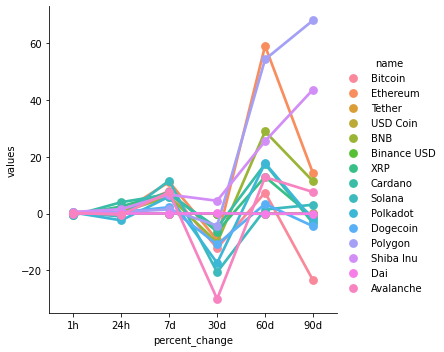

In [57]:
sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [66]:
df9 = temp[['name', 'quote.USD.price','timestamp']] 
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,21385.943900,2022-09-10 17:04:56.319851
15,Bitcoin,21379.173908,2022-09-10 17:06:15.868653


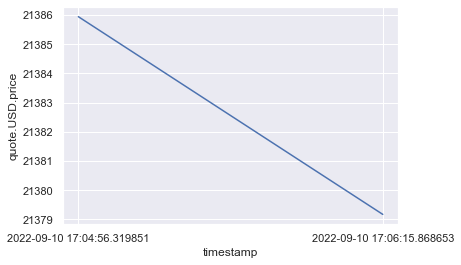

In [69]:
sns.set(style = 'darkgrid')

sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df9)